# Financial and Economic Data Applications
Original from Wes McKinney (https://github.com/wesm/pydata-book/tree/1st-edition)

Updated and edited for Python circa 2018 by R. D. Slater


In [2]:
%pwd

'/home/george_sturrock/qtw'

## Signal frontier analysis
### Data Acquisition
Import libraries and download daily adjusted close stock prices and Dow Jones values.

data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [3]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
start_dt=datetime.datetime(2016,1,1)
end_dt=datetime.datetime(2018,9,15)
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

yf.pdr_override()
names=['APC', 'FB', 'NFLX', 'SPLK', 'TWTR', 'UBNT', 'WMT']

try:
    px=pdr.get_data_yahoo(tickers=names, start=start_dt, end=end_dt)['Adj Close']
    djiPx=pdr.get_data_yahoo(tickers='^DJI', start=start_dt, end=end_dt)['Adj Close']
except Exception as e:
    print(e)
    print('Loading Pickle Files')
    px = pd.read_pickle('px.pkl')
    djiPx = pd.read_pickle('djiPx.pkl')

[*********************100%***********************]  7 of 7 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
#pickle files
px.to_pickle('px.pkl')
djiPx.to_pickle('djiPx.pkl')

#csv files
px.to_csv('px.csv')
djiPx.to_csv('djiPx.csv')

View the dataframe containing the daily adjust close stock price for each security.

In [5]:
print(px.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 681 entries, 2016-01-04 to 2018-09-14
Data columns (total 7 columns):
APC     681 non-null float64
FB      681 non-null float64
NFLX    681 non-null float64
SPLK    681 non-null float64
TWTR    681 non-null float64
UBNT    681 non-null float64
WMT     681 non-null float64
dtypes: float64(7)
memory usage: 42.6 KB
None


### Data Processing
Create dataframe for daily returns for each stock.

In [6]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()

View Dow Jones daily data and Dow Jones daily returns.

In [7]:
djiPx = djiPx.asfreq('B').fillna(method='pad')
print(djiPx.describe())
djiRets = djiPx.pct_change()
print(djiRets.describe())

count      705.000000
mean     21192.011260
std       2998.651660
min      15660.179688
25%      18329.039063
50%      20975.779297
75%      24264.300781
max      26616.710938
Name: Adj Close, dtype: float64
count    704.000000
mean       0.000626
std        0.007282
min       -0.046049
25%       -0.002122
50%        0.000538
75%        0.003982
max        0.028445
Name: Adj Close, dtype: float64


Create dataframe for total average daily price and average daily return of the entire portfolio.

In [8]:
pxTot = px.mean(axis=1)
print(pxTot.describe())
pxTotRet = pxTot.pct_change()
print(pxTotRet.describe())

count    705.000000
mean      87.558766
std       25.198542
min       51.500724
25%       68.415955
50%       78.486270
75%      106.116972
max      145.653262
dtype: float64
count    704.000000
mean       0.001197
std        0.013001
min       -0.060180
25%       -0.004500
50%        0.000937
75%        0.008341
max        0.052507
dtype: float64


In [9]:
pd.set_option('display.max_rows', 800)
print(pxTot)
print(djiPx)

Date
2016-01-04     61.233712
2016-01-05     60.906653
2016-01-06     61.360792
2016-01-07     59.236614
2016-01-08     58.233490
2016-01-11     58.270335
2016-01-12     58.908457
2016-01-13     55.826712
2016-01-14     56.442595
2016-01-15     54.750649
2016-01-18     54.750649
2016-01-19     54.790469
2016-01-20     54.385513
2016-01-21     54.513470
2016-01-22     55.679439
2016-01-25     54.604970
2016-01-26     54.675166
2016-01-27     53.210131
2016-01-28     55.565714
2016-01-29     56.677444
2016-02-01     57.720167
2016-02-02     56.644138
2016-02-03     56.923833
2016-02-04     56.364090
2016-02-05     52.972112
2016-02-08     51.627817
2016-02-09     51.518874
2016-02-10     52.249715
2016-02-11     51.500724
2016-02-12     52.406200
2016-02-15     52.406200
2016-02-16     53.130589
2016-02-17     55.289983
2016-02-18     53.572574
2016-02-19     53.493351
2016-02-22     54.845243
2016-02-23     53.911055
2016-02-24     54.860669
2016-02-25     55.920645
2016-02-26     56.31

In [10]:
plt.close('all')

### Calculations
#### Daily Returns
Calculate and plot the cumulative returns of each stock.

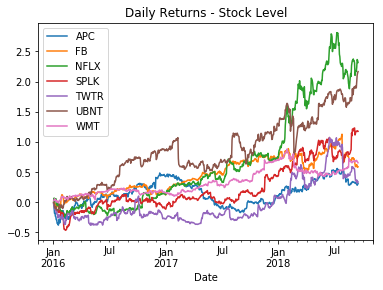

In [11]:
#Daily Returns for each stock
((1 + rets).cumprod() - 1).plot(title="Daily Returns - Stock Level")

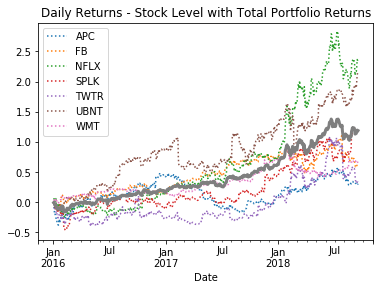

In [12]:
#Daily Returns for each stock with portfolio total in grey
((1 + rets).cumprod() - 1).plot(linestyle=":", linewidth = 1.5)
((1 + pxTotRet).cumprod() - 1).plot(linewidth = 3, title="Daily Returns - Stock Level with Total Portfolio Returns")

Cummulative Return for the Portfolio

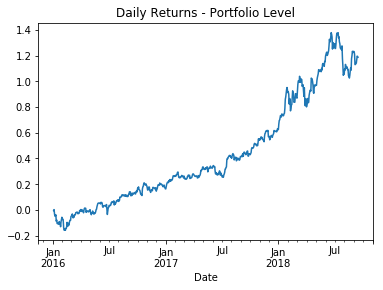

In [13]:
((1 + pxTotRet).cumprod() - 1).plot(title="Daily Returns - Portfolio Level")

#### Moving Window Averages

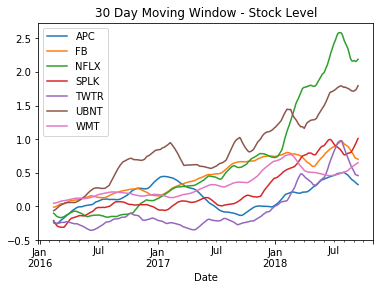

In [14]:
#30 Day Rolling Moving Window Average
((1 + rets).cumprod() - 1).rolling(30).mean().plot(title="30 Day Moving Window - Stock Level")

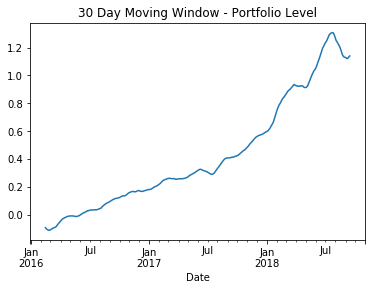

In [15]:
#30 Day Rolling Moving Widow Average for the Portfolio
((1 + pxTotRet).cumprod() - 1).rolling(30).mean().plot(title="30 Day Moving Window - Portfolio Level")

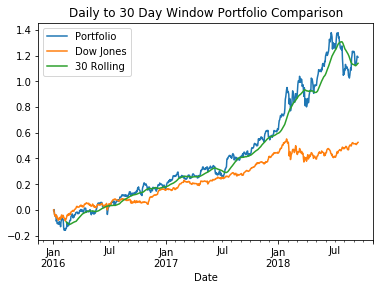

In [58]:
#Daily Portfolio to 30 Day Rolling Window Average
((1 + pxTotRet).cumprod() - 1).plot(label="Portfolio")
((1 + djiRets).cumprod() - 1).plot(label="Dow Jones")
((1 + pxTotRet).cumprod() - 1).rolling(30).mean().plot(title="Daily to 30 Day Window Portfolio Comparison", label="30 Rolling").legend()

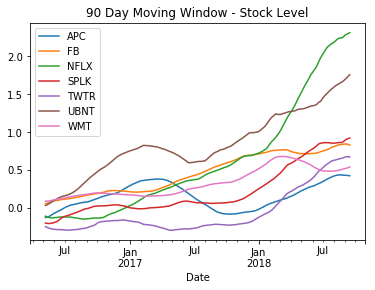

In [17]:
#90 Day Rolling Moving Window Average
((1 + rets).cumprod() - 1).rolling(90).mean().plot(title="90 Day Moving Window - Stock Level")

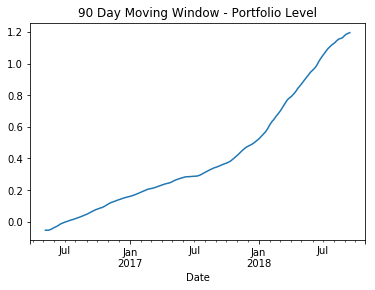

In [53]:
#90 Day Rolling Moving Widow Average for the Portfolio
((1 + pxTotRet).cumprod() - 1).rolling(90).mean().plot(title="90 Day Moving Window - Portfolio Level")

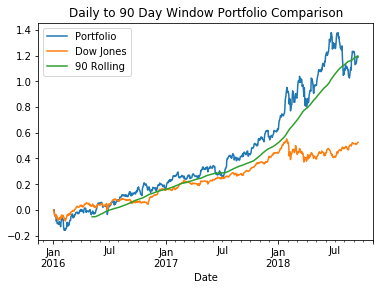

In [63]:
#Daily Portfolio to 90 Day Rolling Window Average
((1 + pxTotRet).cumprod() - 1).plot(label="Portfolio")
((1 + djiRets).cumprod() - 1).plot(label="Dow Jones")
((1 + pxTotRet).cumprod() - 1).rolling(90).mean().plot(title="Daily to 90 Day Window Portfolio Comparison", label="90 Rolling").legend()

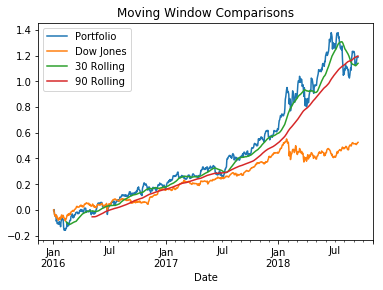

In [90]:
#Rolling Window Average to Portfolio to Dow
((1 + pxTotRet).cumprod() - 1).plot(label="Portfolio")
((1 + djiRets).cumprod() - 1).plot(label="Dow Jones")
((1 + pxTotRet).cumprod() - 1).rolling(30).mean().plot(label="30 Rolling")
((1 + pxTotRet).cumprod() - 1).rolling(90).mean().plot(title="Moving Window Comparisons", label="90 Rolling").legend()

#### Exponentially Weighted Functions

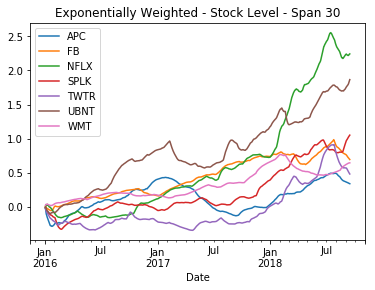

In [20]:
#30 Day Exponentially Weighted Function
((1 + rets).cumprod() - 1).ewm(span=30).mean().plot(title="Exponentially Weighted - Stock Level - Span 30")

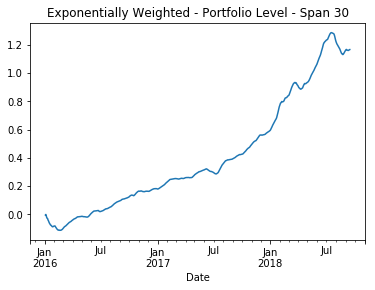

In [21]:
#30 Day Exponentially Weighted Function for the Portfolio
((1 + pxTotRet).cumprod() - 1).ewm(span=30).mean().plot(title="Exponentially Weighted - Portfolio Level - Span 30")

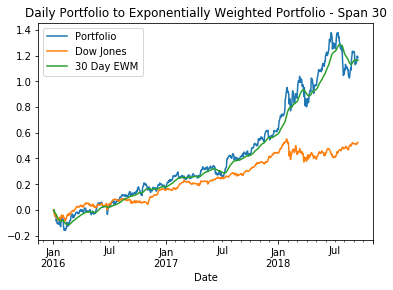

In [61]:
#Compare Daily Portfolio Returns to 30 Day Exponentially Weighted Function for the Portfolio
((1 + pxTotRet).cumprod() - 1).plot(label="Portfolio")
((1 + djiRets).cumprod() - 1).plot(label="Dow Jones")
((1 + pxTotRet).cumprod() - 1).ewm(span=30).mean().plot(title="Daily Portfolio to Exponentially Weighted Portfolio - Span 30"
                                                       , label="30 Day EWM").legend()

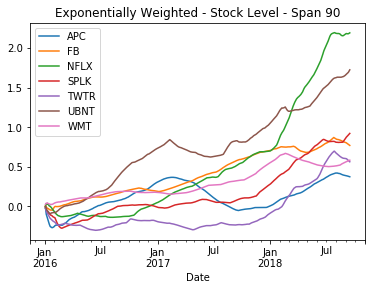

In [23]:
#90 Day Exponentially Weighted Function
((1 + rets).cumprod() - 1).ewm(span=90).mean().plot(title="Exponentially Weighted - Stock Level - Span 90")

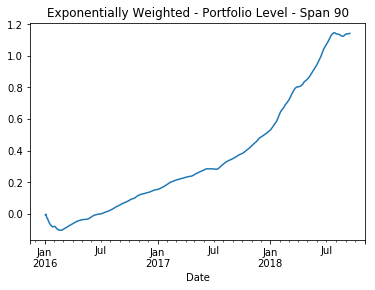

In [24]:
#90 Day Exponentially Weighted Function for the Portfolio
((1 + pxTotRet).cumprod() - 1).ewm(span=90).mean().plot(title="Exponentially Weighted - Portfolio Level - Span 90")

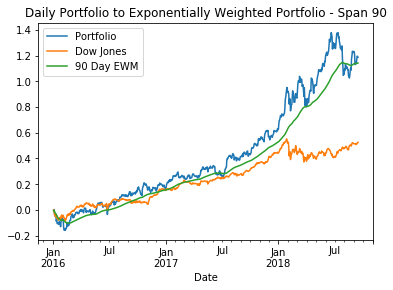

In [62]:
#Compare Daily Portfolio Returns to 90 Day Exponentially Weighted Function for the Portfolio
((1 + pxTotRet).cumprod() - 1).plot(label="Portfolio")
((1 + djiRets).cumprod() - 1).plot(label="Dow Jones")
((1 + pxTotRet).cumprod() - 1).ewm(span=90).mean().plot(title="Daily Portfolio to Exponentially Weighted Portfolio - Span 90"
                                                       , label="90 Day EWM").legend()

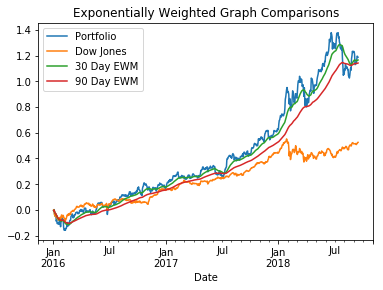

In [92]:
#Compare Daily Portfolio Returns to Exponentially Weighted Function for the Portfolio
((1 + pxTotRet).cumprod() - 1).plot(label="Portfolio")
((1 + djiRets).cumprod() - 1).plot(label="Dow Jones")
((1 + pxTotRet).cumprod() - 1).ewm(span=30).mean().plot(label="30 Day EWM")
((1 + pxTotRet).cumprod() - 1).ewm(span=90).mean().plot(title="Exponentially Weighted Graph Comparisons", 
                                                        label="90 Day EWM").legend()

#### Binary Moving Window Function

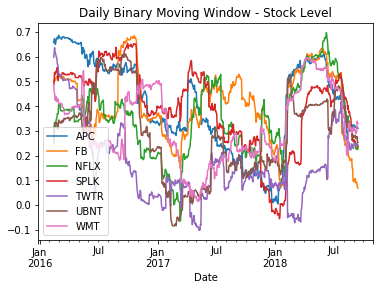

In [26]:
#Correlation of individual stocks to Dow Jones
corr = rets.rolling(90, min_periods=30).corr(djiRets)
corr.plot(title="Daily Binary Moving Window - Stock Level")

count    675.000000
mean       0.594811
std        0.116819
min        0.317915
25%        0.486821
50%        0.614969
75%        0.709307
max        0.767853
dtype: float64


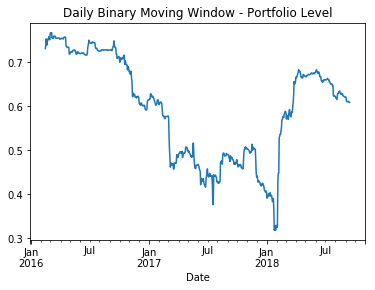

In [68]:
#Correlation of portfolio to Dow Jones
corr = pxTotRet.rolling(180, min_periods=30).corr(djiRets)
corr.plot(title="Daily Binary Moving Window - Portfolio Level")
print(corr.describe())

In [28]:
#Pearson's R for Portfolio Returns and Dow Jones Returns
from scipy import stats
print("Pearson's R:", stats.pearsonr(djiRets.dropna(), pxTotRet.dropna()))

Pearson's R: (0.6081352778752408, 2.0118327690193301e-72)


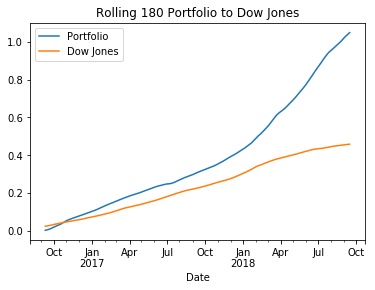

In [65]:
#Portfolio Daily Return Compared to Dow Jones Daily Returns
#((1 + pxTotRet).cumprod() - 1).plot()
#((1 + djiRets).cumprod() - 1).plot()
((1 + pxTotRet).cumprod() - 1).rolling(180).mean().plot(label="Portfolio")
((1 + djiRets).cumprod() - 1).rolling(180).mean().plot(title="Rolling 180 Portfolio to Dow Jones", label="Dow Jones").legend()

Function to compute momentum over a certain lookback, then rank in descending order and standardize.

In [30]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

#### Sharpe Ratio
The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Subtracting the risk-free rate from the mean return, the performance associated with risk-taking activities can be isolated. One intuition of this calculation is that a portfolio engaging in “zero risk” investment, such as the purchase of U.S. Treasury bills (for which the expected return is the risk-free rate), has a Sharpe ratio of exactly zero. Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.

Read more: Sharpe Ratio | Investopedia https://www.investopedia.com/terms/s/sharperatio.asp#ixzz5RaDYJ4lJ 

The function to set up a strategy backtesting function that computes a portfolio for a particular lookback and holding period (days between trading), returning the overall Sharpe ratio is shown below.

In [31]:
import numpy as np

compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

Sharpe Ratio output.  

In [32]:
strat_sr(px, 70, 30)

0.689829320382653

Evaluate the strat_sr function over a grid of parameters, storing them as you go in a defaultdict and finally putting the results in a DataFrame.

- Holding = Days Between Buy and Sell Trades
- Lookback = return based on the stock price at the beginning of the lookback period

In [75]:
from collections import defaultdict

lookbacks = range(20, 180, 10)
holdings = range(20, 180, 10)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = pd.DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

Create function to visualize the results of lookback and holding parameter grid from the strat_sr function.

In [76]:
#https://matplotlib.org/examples/color/colormaps_reference.html

def heatmap(df, cmap=plt.cm.seismic):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

Heatmap to visualize Sharpe Ratio results from strat_sr function.  (Higher is better)

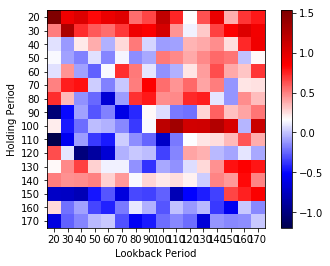

In [88]:
heatmap(ddf)
plt.show()

In [86]:
print("Best Score---", "Lookback: 20", "Hold: 20", "Share Ratio:", strat_sr(px, 20, 20))
print("Worst Score--", "Lookback: 20", "Hold: 110", "Share Ratio:", strat_sr(px, 20, 110))

print("Lookback: 40", "Hold: 75", "Sharpe Ratio:", strat_sr(px, 40, 75))

Best Score--- Lookback: 20 Hold: 20 Share Ratio: 1.529032323556294
Worst Score-- Lookback: 20 Hold: 110 Share Ratio: -1.1938814952733507
Lookback: 40 Hold: 75 Sharpe Ratio: -1.411866306629733


In [81]:
ddfMax = ddf.max(axis=1)
print(ddfMax.max())
ddfMin = ddf.min(axis=1)
print(ddfMin.min())

1.529032323556294
-1.1938814952733507


### References

https://www.quantinsti.com/blog/portfolio-optimization-maximum-return-risk-ratio-python/

https://arxiv.org/pdf/1602.06186.pdf/

https://www.quantinsti.com/blog/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/

https://www.mystockoptions.com/content/what-is-a-lookback

https://www.investopedia.com/terms/s/sharperatio.asp